# <center> <h1>   🔴 🟢 🔵    🧑‍💻   🔵 🟢 🔴

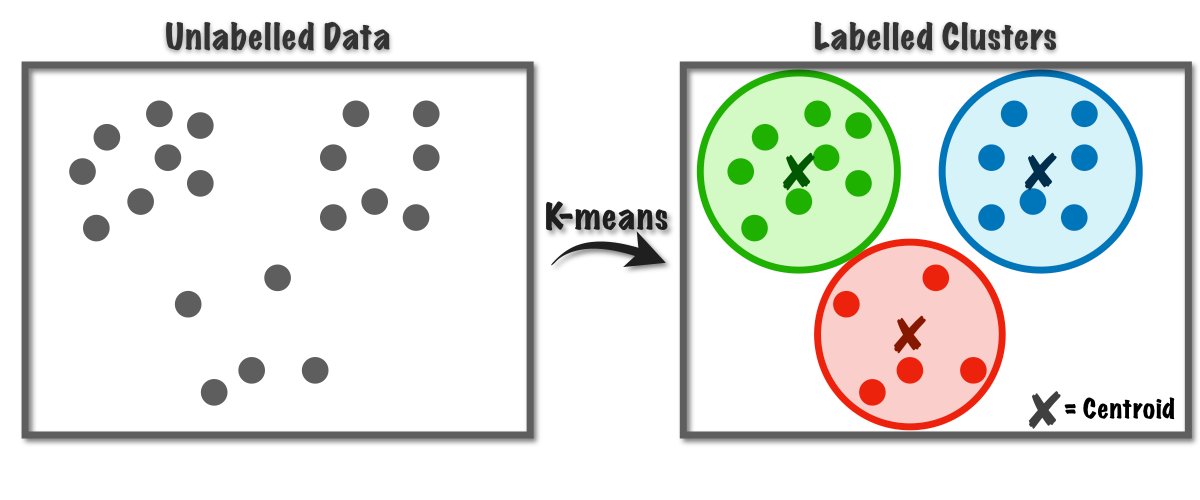

### <center> k-means allows us to divide our dataset into several clusters (groups). That is, similar data are in one cluster. First, we randomly select the centroid (not too random, as you can see in the code). Then we calculate the distance from each data to the centroid (for example, Euclidean). The centroid that the data is closest to belongs to that centroid. Then, in each cycle, we change the centroid by comparing it with the previous value and calculate the distance from the data to the centroid again.

` We will try using k-means in computer vision `

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

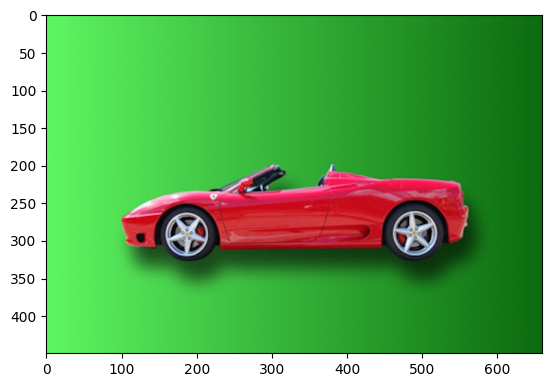

In [2]:
img = cv2.imread("Photo/carr.jpg")     #load images from local file
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #convert image from bgr to rgb   
plt.imshow(img)     #show the picture


In [3]:
img[:,:,0]

array([[94, 94, 94, ..., 12, 13, 13],
       [94, 94, 94, ..., 13, 12, 12],
       [94, 94, 94, ..., 13, 12, 12],
       ...,
       [94, 94, 94, ..., 11, 11, 11],
       [94, 94, 94, ..., 13, 12, 12],
       [94, 94, 94, ..., 13, 12, 12]], dtype=uint8)

In [4]:
img[:,:,1]

array([[246, 246, 246, ..., 107, 108, 108],
       [246, 246, 246, ..., 108, 107, 107],
       [246, 246, 246, ..., 108, 107, 107],
       ...,
       [246, 246, 246, ..., 108, 108, 108],
       [246, 246, 246, ..., 108, 107, 107],
       [246, 246, 246, ..., 108, 107, 107]], dtype=uint8)

In [5]:
img[:,:,2]

array([[99, 99, 99, ..., 15, 16, 16],
       [99, 99, 99, ..., 16, 15, 15],
       [99, 99, 99, ..., 16, 15, 15],
       ...,
       [99, 99, 99, ..., 15, 15, 15],
       [99, 99, 99, ..., 16, 15, 15],
       [99, 99, 99, ..., 16, 15, 15]], dtype=uint8)

In [6]:
img.shape

(450, 660, 3)

In [8]:
img_ = img.reshape(-1,3)
img_.shape

(297000, 3)

In [9]:
img_ = np.float32(img_)
img_

array([[ 94., 246.,  99.],
       [ 94., 246.,  99.],
       [ 94., 246.,  99.],
       ...,
       [ 13., 108.,  16.],
       [ 12., 107.,  15.],
       [ 12., 107.,  15.]], dtype=float32)

In [10]:
M = np.mean(img_, axis=0)      # we find the averages for each column.
M

array([ 66.91537 , 156.41287 ,  57.465496], dtype=float32)

In [11]:
D = np.var(img_, axis=0)       # we calculate the variance for each column.
D

array([2770.0818, 3797.3574, 1050.3303], dtype=float32)

In [12]:
K = 3

In [13]:
ma = [np.random.normal(M, np.sqrt(D / 10), 3) for n in range(K)]        # initial centers of clusters
ma
# let's take k random centroids

[array([ 49.2022242 , 138.64477312,  56.22713952]),
 array([ 37.03172947, 165.58547773,  53.58084234]),
 array([ 54.05200619, 158.85039624,  39.36910105])]

In [14]:
def euclid(x,y):
    
    evklid = np.mean((x - y) ** 2)
    
    return evklid

In [15]:
COLORS = ('green', 'blue', 'brown', 'black')

In [16]:
x_true = True

n=0

while x_true==True:
    
    X = [[] for i in range(K)] 
    label=[]
    
    for i in img_:
        r = [euclid(i, m) for m in ma]         # we calculate the distance from each point to the centroid
        X[np.argmin(r)].append(i)          # returns the index of the minimum value
        label.append(np.argmin(r))
        
    ma = [np.mean(xx, axis=0) for xx in X]      # update centroids
    
     # We compare the position of the previous centroid and the new one and stop the cycle if the change is less than 0.001
     # or stop the cycle when the cycle reaches 500
    
    if n==0:
        ma_cp=np.zeros((K,2))
        ayirma_cp = np.zeros(K)
        ayirma=[]
        for i in range(K):
            ayirma1 = ((ma[i][0] - ma_cp[i][0])**2 + (ma[i][1] - ma_cp[i][1])**2)
            ayirma.append(ayirma1)           
        
        ma_cp=ma
        ayirma_cp = ayirma
    
    else:
        ayirma=[]
        for i in range(K):
            ayirma1 = ((ma[i][0] - ma_cp[i][0])**2 + (ma[i][1] - ma_cp[i][1])**2)
            
            ayirma.append(ayirma1)
        s=0
        
        for i in range(K):
                   
            if abs(ayirma[i]-ayirma_cp[i])<0.00001:   # Threshold. 
                # If the position of the previous center and the current center have moved by 0.0001, the loop stops.
                # Why exactly 0.00001 ? this is a very slow shifter.
                # That's why we can stop the cycle in this case
                s+=1
        
        if s==3:
            x_true=False
                   
        ma_cp=ma
        ayirma_cp=ayirma
    
    n+=1
    
    if n==700:
        x_true=False
        print("We stopped because the cycle reached 500")
        

In [17]:
n
# Stopped in 10 cycles
# Because the centroid has moved less than 0.0001

10

In [18]:
label
# centroids class

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [19]:
label = np.array(label)

In [20]:
ma

[array([202.62733 ,  44.469612,  65.191795], dtype=float32),
 array([ 76.99085, 210.66365,  81.32868], dtype=float32),
 array([ 29.644333, 126.04129 ,  32.596825], dtype=float32)]

In [21]:
center = ma
center = np.uint8(center)
center

array([[202,  44,  65],
       [ 76, 210,  81],
       [ 29, 126,  32]], dtype=uint8)

In [22]:
center.shape

(3, 3)

In [23]:
label = np.expand_dims(label, 1)
label.shape

(297000, 1)

In [24]:
label = label.reshape(img.shape[0], img.shape[1])
label.shape

(450, 660)

In [25]:
k_means_img = center[label.flatten()]
k_means_img

array([[ 76, 210,  81],
       [ 76, 210,  81],
       [ 76, 210,  81],
       ...,
       [ 29, 126,  32],
       [ 29, 126,  32],
       [ 29, 126,  32]], dtype=uint8)

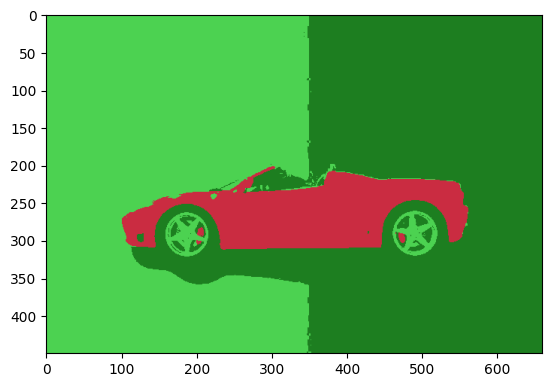

In [26]:
k_means_img = k_means_img.reshape(img.shape)
plt.imshow(k_means_img)

## <center> Implementation in Opencv

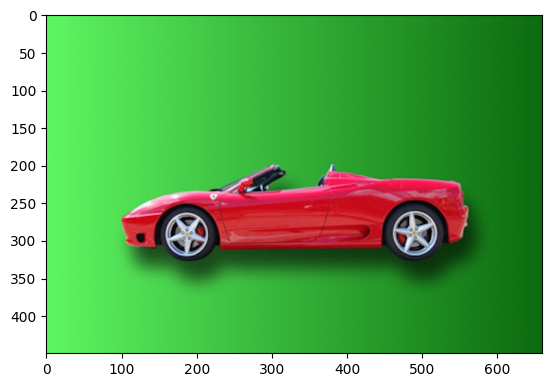

In [28]:
img = cv2.imread("Photo/carr.jpg")     #load images from local file
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #convert image from bgr to rgb   
plt.imshow(img)     #show the picture

In [29]:
img[:,:,0]

array([[94, 94, 94, ..., 12, 13, 13],
       [94, 94, 94, ..., 13, 12, 12],
       [94, 94, 94, ..., 13, 12, 12],
       ...,
       [94, 94, 94, ..., 11, 11, 11],
       [94, 94, 94, ..., 13, 12, 12],
       [94, 94, 94, ..., 13, 12, 12]], dtype=uint8)

In [30]:
img[:,:,1]

array([[246, 246, 246, ..., 107, 108, 108],
       [246, 246, 246, ..., 108, 107, 107],
       [246, 246, 246, ..., 108, 107, 107],
       ...,
       [246, 246, 246, ..., 108, 108, 108],
       [246, 246, 246, ..., 108, 107, 107],
       [246, 246, 246, ..., 108, 107, 107]], dtype=uint8)

In [31]:
img[:,:,2]

array([[99, 99, 99, ..., 15, 16, 16],
       [99, 99, 99, ..., 16, 15, 15],
       [99, 99, 99, ..., 16, 15, 15],
       ...,
       [99, 99, 99, ..., 15, 15, 15],
       [99, 99, 99, ..., 16, 15, 15],
       [99, 99, 99, ..., 16, 15, 15]], dtype=uint8)

In [32]:
img.shape

(450, 660, 3)

In [33]:
img_ = img.reshape(-1,3)
img_.shape

(297000, 3)

In [34]:
img_ = np.float32(img_) # convert data type npfloat32
img_

array([[ 94., 246.,  99.],
       [ 94., 246.,  99.],
       [ 94., 246.,  99.],
       ...,
       [ 13., 108.,  16.],
       [ 12., 107.,  15.],
       [ 12., 107.,  15.]], dtype=float32)

# K = 3

In [35]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,0.1)

# cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
# cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
# cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.


k=3

compactness, label, center = cv2.kmeans(img_, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)



In [36]:
compactness

527684090.1028838

In [37]:
label
# centroids class

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [38]:
len(label)

297000

In [39]:
center

array([[202.65184 ,  44.53712 ,  65.25879 ],
       [ 29.33055 , 125.30702 ,  32.263783],
       [ 76.54432 , 210.0603  ,  80.88132 ]], dtype=float32)

In [40]:
center = np.uint8(center)
center

array([[202,  44,  65],
       [ 29, 125,  32],
       [ 76, 210,  80]], dtype=uint8)

In [41]:
center.shape

(3, 3)

In [42]:
label.shape

(297000, 1)

In [43]:
label = label.reshape(img.shape[0], img.shape[1])
label.shape

(450, 660)

In [44]:
label

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=int32)

In [45]:
k_means_img = center[label.flatten()]
k_means_img

array([[ 76, 210,  80],
       [ 76, 210,  80],
       [ 76, 210,  80],
       ...,
       [ 29, 125,  32],
       [ 29, 125,  32],
       [ 29, 125,  32]], dtype=uint8)

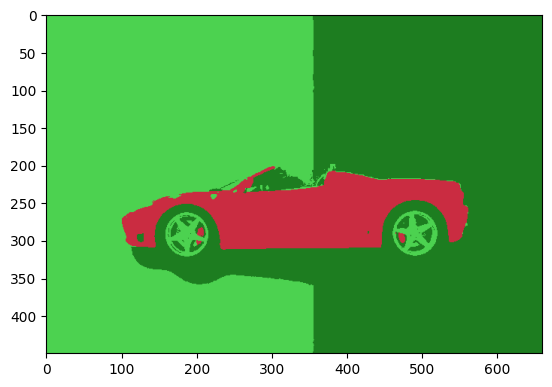

In [46]:
k_means_img = k_means_img.reshape(img.shape)
plt.imshow(k_means_img)

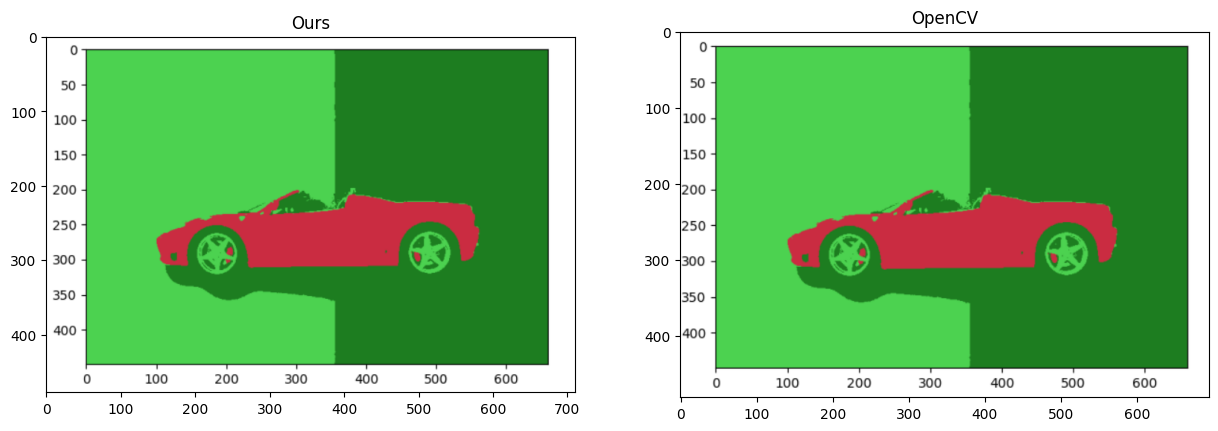

In [50]:
img1 = cv2.imread("Photo/carrr..png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("Photo/carrr...png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Ours")
plt.imshow(img1)

plt.subplot(122)
plt.title("OpenCV")
plt.imshow(img2)



# If you look at the picture, what we did and Opencv's are almost the same
